In [113]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from util import func_confusion_matrix
from sklearn.model_selection import train_test_split
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
from keras.utils.np_utils import to_categorical



# load (downloaded if needed) the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


# transform each image from 28 by28 to a 784 pixel vector
pixel_count = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(x_train.shape[0], pixel_count).astype('float32')
x_test = x_test.reshape(x_test.shape[0], pixel_count).astype('float32')

# normalize inputs from gray scale of 0-255 to values between 0-1
x_train = x_train / 255
x_test = x_test / 255



In [114]:
#Q1 
#further split samples for validation data
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=10000)

batch_size = 150
num_classes = 10
epochs = 13

mod1 = Sequential()
mod1.add(Dense(150, activation='sigmoid', input_shape=(784,)))
mod1.add(Dense(200, activation='relu'))
mod1.add(Dense(250, activation='sigmoid'))
mod1.add(Dense(num_classes, activation='softmax'))

mod2 = Sequential()
mod2.add(Dense(100, activation='tanh', input_shape=(784,)))
mod2.add(Dense(300, activation='relu'))
mod2.add(Dense(240, activation='softmax'))
mod2.add(Dense(num_classes, activation='sigmoid'))

mod3 = Sequential()
mod3.add(Dense(250, activation='relu', input_shape=(784,)))
mod3.add(Dense(250, activation='softmax'))
mod3.add(Dense(250, activation='relu'))
mod3.add(Dense(num_classes, activation='softmax'))





In [115]:
#compile model 
mod1.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

mod2.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

mod3.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

y_train = to_categorical(y_train, num_classes=num_classes, dtype='int')


In [116]:
#fitting models
mod1.fit(x_train,y_train, batch_size=batch_size, epochs=epochs, verbose=0)

mod2.fit(x_train,y_train, batch_size=batch_size, epochs=epochs, verbose=0)

mod3.fit(x_train,y_train, batch_size=batch_size, epochs=epochs, verbose=0)

In [117]:
#predicting using different models 

y_pred1=mod1.predict_classes(x_test)

y_pred2=mod2.predict_classes(x_test)

y_pred3=mod3.predict_classes(x_test)



In [123]:
#confusion matrix and evaluation metrics

#model 1
func_confusion_matrix(y_test, y_pred1)


(array([[ 960,    0,    3,    0,    0,    2,   12,    1,    2,    0],
        [   0, 1124,    5,    0,    0,    1,    2,    0,    3,    0],
        [   2,    0, 1019,    1,    1,    0,    3,    3,    3,    0],
        [   0,    1,   15,  974,    0,    5,    1,    7,    7,    0],
        [   0,    0,    4,    0,  965,    0,    9,    3,    0,    1],
        [   2,    0,    0,    5,    1,  869,   10,    1,    3,    1],
        [   1,    3,    0,    0,    3,    6,  945,    0,    0,    0],
        [   2,    5,   24,    0,    0,    0,    0,  993,    2,    2],
        [   1,    1,   11,    3,    1,    5,    7,    5,  938,    2],
        [   1,    6,    1,    7,   25,   10,    1,   12,    7,  939]]),
 0.9726,
 array([0.97959184, 0.99030837, 0.9874031 , 0.96435644, 0.98268839,
        0.97421525, 0.98643006, 0.96595331, 0.96303901, 0.93062438]),
 array([0.99071207, 0.98596491, 0.94177449, 0.98383838, 0.9688755 ,
        0.96770601, 0.95454545, 0.96878049, 0.97202073, 0.99365079]))

In [119]:

#model 2
func_confusion_matrix(y_test, y_pred2)

(array([[ 974,    0,    0,    1,    0,    1,    1,    0,    2,    1],
        [   0, 1122,    2,    2,    0,    0,    2,    2,    5,    0],
        [  11,    2,  974,    4,    3,    0,   22,    4,   10,    2],
        [   1,    0,    2,  904,    0,   84,    0,    2,   14,    3],
        [   3,    0,    2,    1,  723,    0,    5,    0,    0,  248],
        [   5,    0,    0,  354,    1,  515,    4,    0,    8,    5],
        [  15,    3,   16,    1,    3,    3,  910,    0,    7,    0],
        [   3,    3,   10,    6,    2,    0,    0,  979,    7,   18],
        [  12,    0,    3,   19,    1,   11,    1,    0,  921,    6],
        [   5,    2,    0,    6,   20,    9,    0,    4,    4,  959]]),
 0.8981,
 array([0.99387755, 0.98854626, 0.94379845, 0.8950495 , 0.73625255,
        0.57735426, 0.94989562, 0.95233463, 0.94558522, 0.95044599]),
 array([0.94655005, 0.99116608, 0.96531219, 0.69645609, 0.96015936,
        0.82664526, 0.96296296, 0.98789102, 0.94171779, 0.77214171]))

In [120]:

#model 3
func_confusion_matrix(y_test, y_pred3)


(array([[ 969,    0,    2,    0,    1,    1,    2,    1,    3,    1],
        [   0, 1130,    2,    0,    0,    0,    1,    0,    2,    0],
        [   3,    8, 1003,    2,    0,    0,    4,    5,    7,    0],
        [   0,    0,    0,  993,    0,    7,    0,    4,    4,    2],
        [   1,    1,    3,    0,  947,    0,    6,    2,    4,   18],
        [   2,    0,    0,    6,    1,  872,    4,    0,    6,    1],
        [   6,    3,    0,    1,    6,    9,  931,    0,    2,    0],
        [   2,    6,    8,    5,    0,    0,    0,  994,    6,    7],
        [   1,    0,    2,    6,    3,    3,    2,    2,  951,    4],
        [   1,    2,    0,   12,    3,    6,    0,    3,    2,  980]]),
 0.977,
 array([0.98877551, 0.99559471, 0.97189922, 0.98316832, 0.96435845,
        0.97757848, 0.97181628, 0.96692607, 0.97638604, 0.97125867]),
 array([0.98375635, 0.9826087 , 0.98333333, 0.96878049, 0.98543184,
        0.97104677, 0.98      , 0.98318497, 0.96352584, 0.96742349]))

In [121]:
#Question 2
#running model 3 over validation set 
y_pred3_val=mod3.predict_classes(x_valid)

func_confusion_matrix(y_valid, y_pred3_val)


(array([[ 969,    1,    5,    0,    0,    2,    0,    0,    1,    2],
        [   0, 1126,    1,    1,    1,    0,    0,    3,    2,    0],
        [   2,    8,  943,    6,    1,    3,    1,    4,    5,    1],
        [   2,    2,    4, 1014,    0,   17,    0,    2,    5,    1],
        [   0,    2,    1,    1,  968,    0,    4,    3,    3,   34],
        [   0,    3,    0,    8,    2,  846,    2,    0,    6,    2],
        [   3,    4,    2,    1,    3,    1,  975,    0,    1,    0],
        [   1,    2,    8,    2,    2,    0,    0, 1055,    0,   10],
        [   3,    0,    5,    6,    1,    6,    4,    2,  936,    6],
        [   1,    2,    0,   12,    4,    3,    0,    3,    3,  913]]),
 0.9745,
 array([0.98877551, 0.99294533, 0.96817248, 0.96848138, 0.95275591,
        0.9735328 , 0.98484848, 0.97685185, 0.96594427, 0.97024442]),
 array([0.98776758, 0.97913043, 0.97316821, 0.96479543, 0.98574338,
        0.96355353, 0.98884381, 0.98414179, 0.97297297, 0.94220846]))

Failed case at index # 54 :
predicted: 9  true: 2


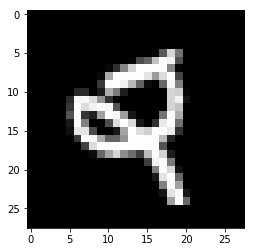

Failed case at index # 74 :
predicted: 2  true: 0


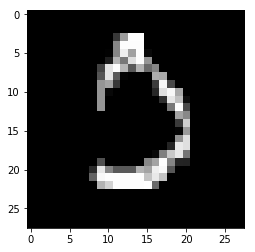

Failed case at index # 75 :
predicted: 1  true: 6


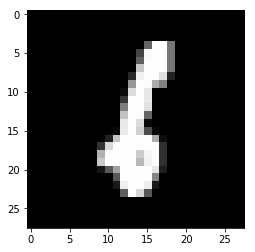

Failed case at index # 113 :
predicted: 5  true: 2


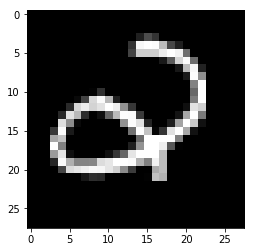

Failed case at index # 155 :
predicted: 8  true: 4


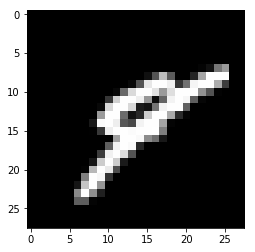

Failed case at index # 165 :
predicted: 1  true: 5


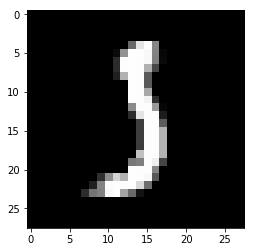

Failed case at index # 200 :
predicted: 8  true: 1


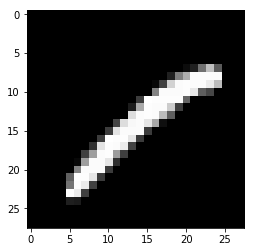

Failed case at index # 212 :
predicted: 2  true: 3


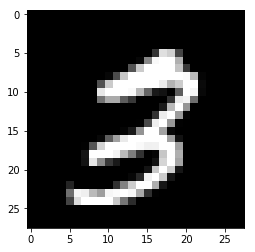

Failed case at index # 295 :
predicted: 6  true: 8


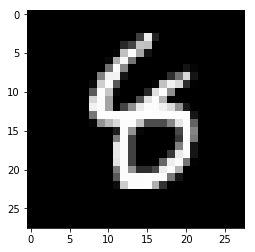

Failed case at index # 332 :
predicted: 3  true: 9


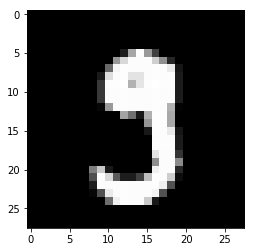

In [122]:
#select and visualize TEN testing images for which your mode made wrong predications.
#Try to analyze the reasons of these failure cases. 

#failure cases

failure = []
for j in range(10000):
    if (y_pred3_val[j] != y_valid[j]):
        failure.append(j)
        print("Failed case at index #",j,":")
        print("predicted:",y_pred3_val[j]," true:",y_valid[j])
        plt.imshow(x_valid[j].reshape(28,28),cmap='gray')
        plt.show()
    if (len(failure)>=10):
        break
            

